In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

%matplotlib inline

In [30]:
train_data = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\Image Classification - MNIST Fashion Dataset\\fashion-mnist_train.csv\\fashion-mnist_train.csv")

In [31]:
test_data = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\Image Classification - MNIST Fashion Dataset\\fashion-mnist_test.csv\\fashion-mnist_test.csv")

In [32]:
train = np.array(train_data, dtype='float32')
test = np.array(test_data, dtype='float32')

In [33]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train.shape

(60000, 785)

Text(0.5, 1.0, 'Coat')

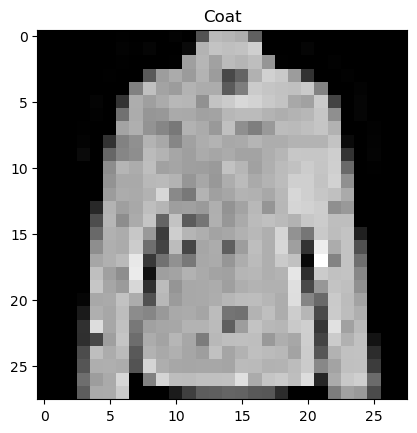

In [38]:
i = random.randint(1,60000) 
plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray')
label_index = train_data["label"][i]
plt.title(f"{class_names[label_index]}")

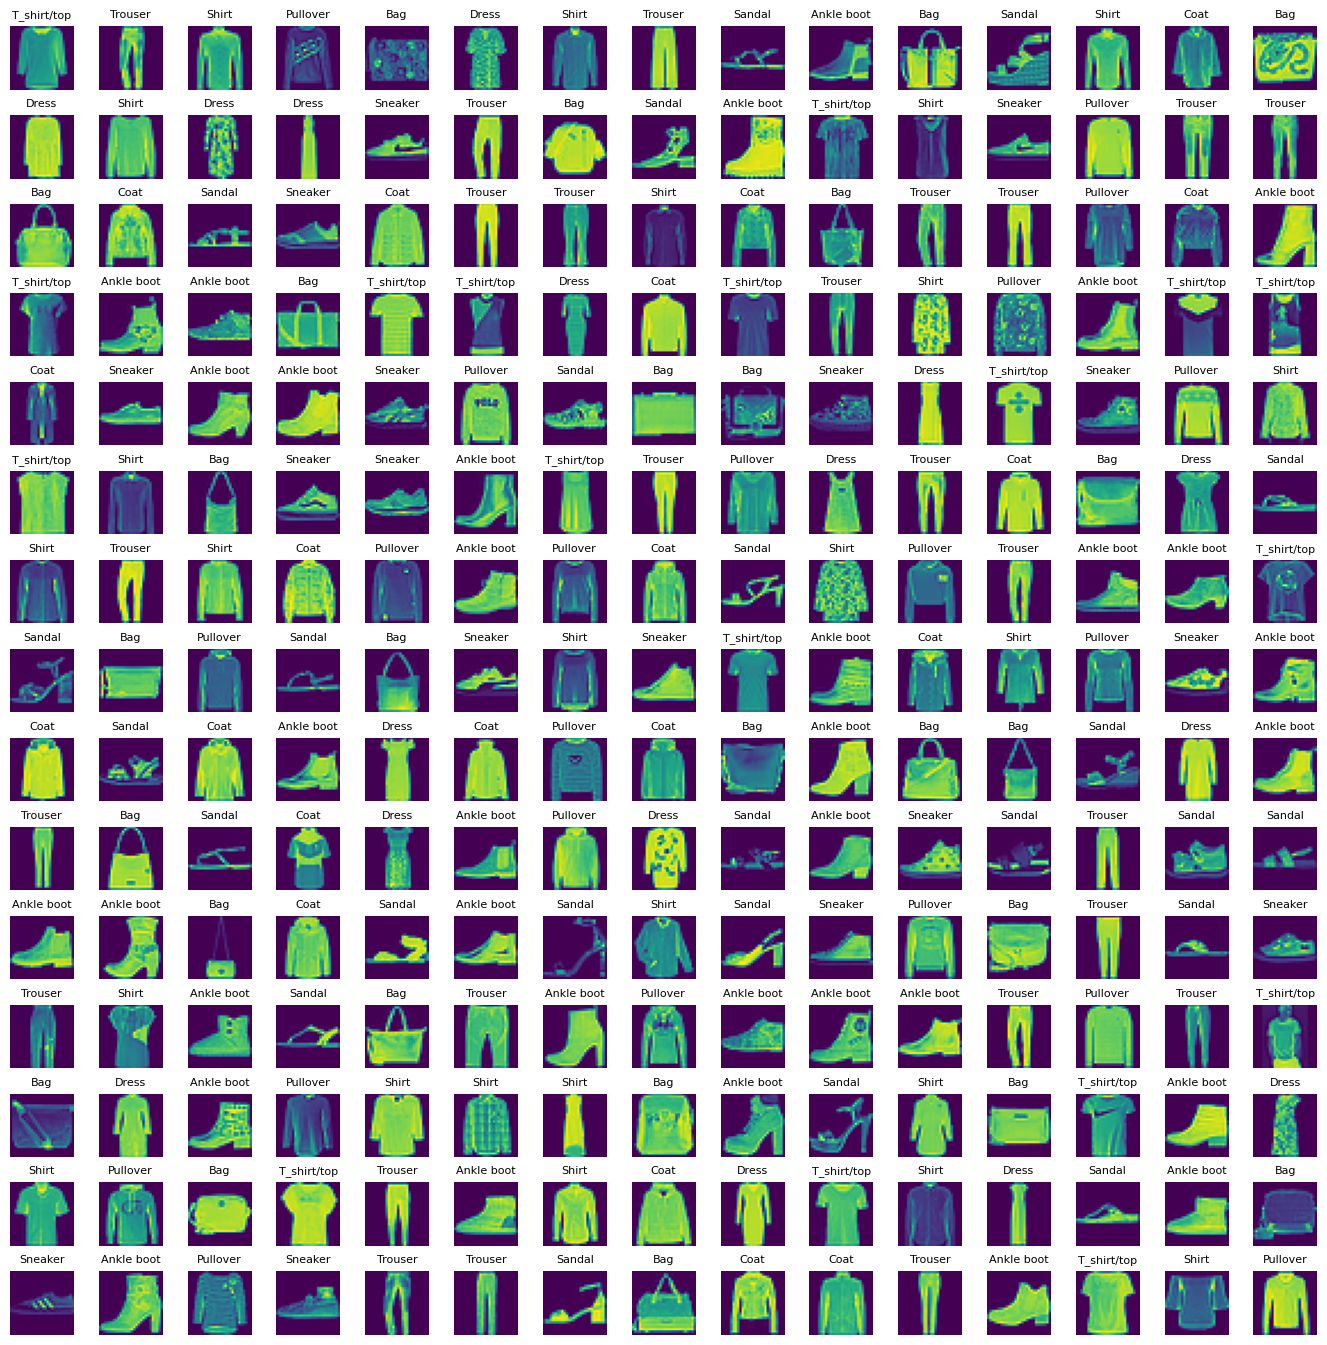

In [39]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() 

n_train = len(train) 

for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_train)  
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [40]:
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

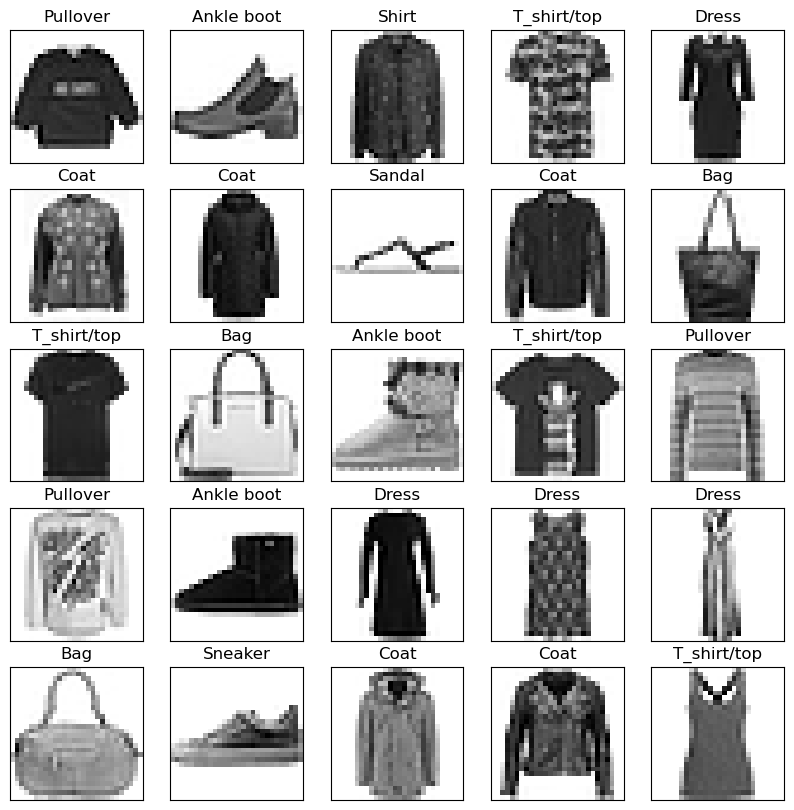

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [46]:
X_train.shape

(48000, 28, 28, 1)

In [47]:
import keras
import tensorflow as tf

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [51]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [52]:
epochs = 50
batch_size = 512

history = model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)

Epoch 1/50


94/94 [==============================] - 47s 455ms/step - loss: 0.6366 - accuracy: 0.7785 - val_loss: 2.9502 - val_accuracy: 0.2075
Epoch 2/50
94/94 [==============================] - 41s 438ms/step - loss: 0.3644 - accuracy: 0.8683 - val_loss: 3.6002 - val_accuracy: 0.1653
Epoch 3/50
94/94 [==============================] - 42s 452ms/step - loss: 0.3066 - accuracy: 0.8876 - val_loss: 4.1809 - val_accuracy: 0.1793
Epoch 4/50
94/94 [==============================] - 44s 466ms/step - loss: 0.2724 - accuracy: 0.9011 - val_loss: 3.0811 - val_accuracy: 0.3133
Epoch 5/50
94/94 [==============================] - 43s 452ms/step - loss: 0.2484 - accuracy: 0.9087 - val_loss: 2.0572 - val_accuracy: 0.5253
Epoch 6/50
94/94 [==============================] - 42s 446ms/step - loss: 0.2266 - accuracy: 0.9168 - val_loss: 0.7944 - val_accuracy: 0.7849
Epoch 7/50
94/94 [==============================] - 42s 446ms/step - loss: 0.2095 - accuracy: 0.9228 - val_loss: 0.2701 - val_accuracy: 0.90

Text(0.5, 1.0, 'Accuracy v/s Epochs')

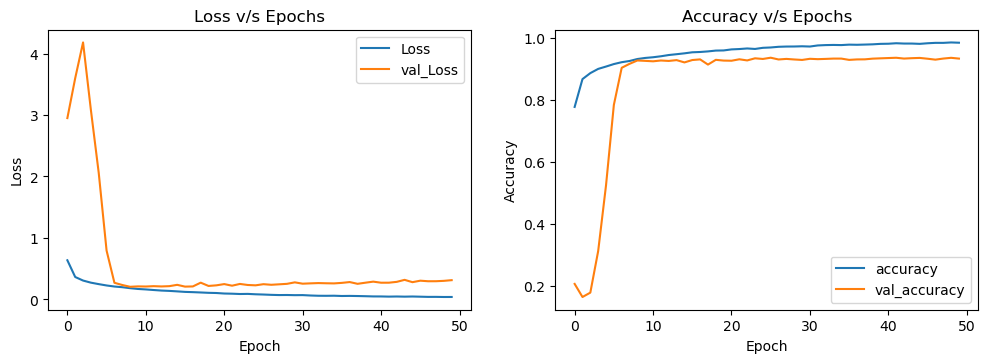

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss v/s Epochs')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s Epochs')

In [55]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 2s 6ms/step


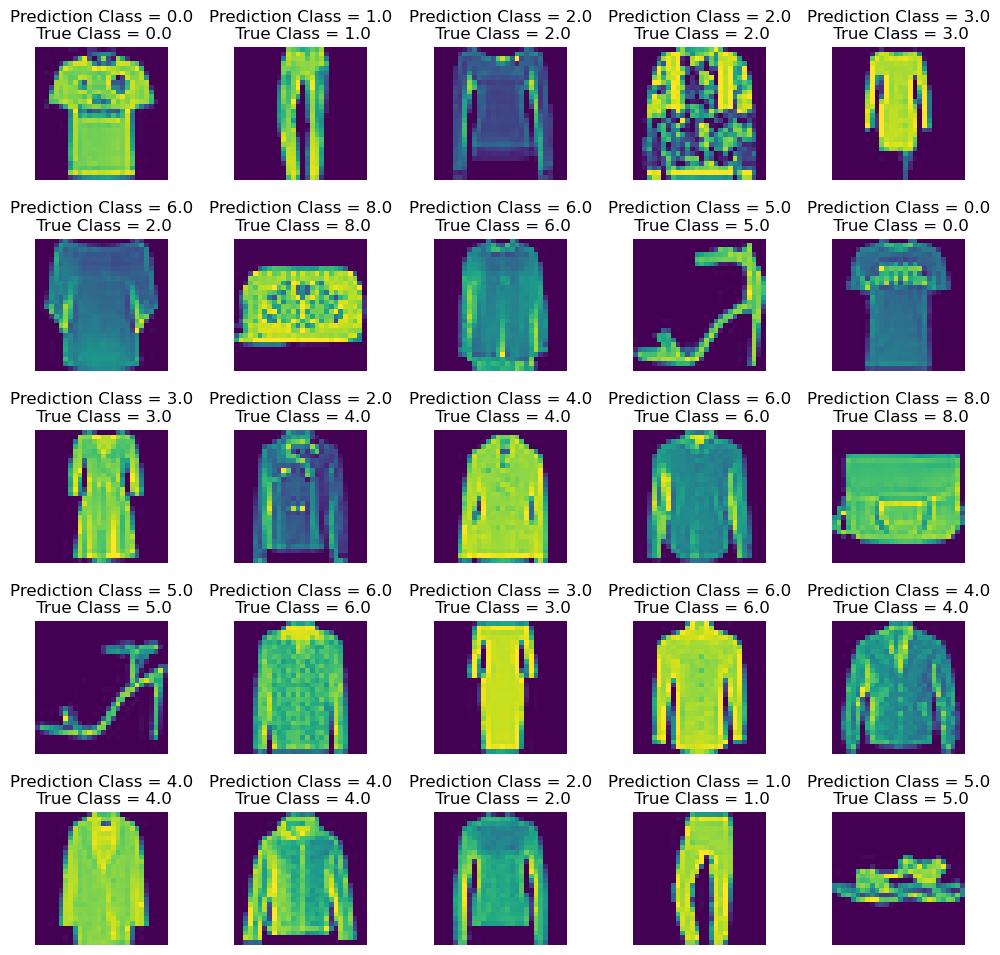

In [56]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)